# Malaria Cell Image Detection

I am using dataset from here(https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria) which contains images of infected and non infected cells 13780 each. In this notebook i will try to create a convolutional neural network to classify these images using Keras.

In [16]:
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16

%matplotlib inline

In [2]:
data=[]
labels=[]
# We read images using for loop and check if any error occurs
Parasitized=os.listdir("~/Downloads/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("~/Downloads/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("~/Downloads/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("~/Downloads/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [3]:
# Converting every data into array format for neural network
imgs=np.array(data)
labels=np.array(labels)

In [4]:
s=np.arange(imgs.shape[0])
np.random.shuffle(s)
imgs=imgs[s]
labels=labels[s]

In [5]:
num_classes=len(np.unique(labels))
len_data=len(imgs)

In [6]:
# seperating train test dataset and normalizing the data
(x_train,x_test)=imgs[(int)(0.1*len_data):],imgs[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [7]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(imgs, labels)

In [9]:
num_classes=len(np.unique(labels))
Y_train=keras.utils.to_categorical(y_train,num_classes)
Y_test=keras.utils.to_categorical(y_test,num_classes)

## Model training

Convolutional neural network consists of multiple layers which learns data step by step and pass weights to next layers. It should consists of following layers:

    1. Conv2D as for convolution layer
    2. MaxPooling2D as for decreaasing the pixels of image
    3. Flatten for converting result into a flat array
    4. Dense layer with softmax activation for output
    
We can obviously add other layers if required but this is standard format used while working with images.

In [10]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))
model.summary()

W0713 17:37:33.608668  2344 deprecation_wrapper.py:119] From C:\Users\vivek\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 17:37:33.621603  2344 deprecation_wrapper.py:119] From C:\Users\vivek\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 17:37:33.623598  2344 deprecation_wrapper.py:119] From C:\Users\vivek\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 17:37:33.634598  2344 deprecation_wrapper.py:119] From C:\Users\vivek\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0713 17:37:33.654545  2344 deprecation_wrapper.py:119] From C:\Users\vivek\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
__________

Then, we need to compile our model with loss function, metrics and optimizer.

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


W0713 17:37:33.707397  2344 deprecation_wrapper.py:119] From C:\Users\vivek\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 17:37:33.724364  2344 deprecation_wrapper.py:119] From C:\Users\vivek\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



While fitting our model we can store value to any variable for future plotting purposes.

In [12]:
history = model.fit(x_train,Y_train,batch_size=50,epochs=20,verbose=2)

W0713 17:37:33.794172  2344 deprecation.py:323] From C:\Users\vivek\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
 - 43s - loss: 0.3951 - acc: 0.8128
Epoch 2/20
 - 43s - loss: 0.1602 - acc: 0.9503
Epoch 3/20
 - 43s - loss: 0.1418 - acc: 0.9549
Epoch 4/20
 - 46s - loss: 0.1304 - acc: 0.9573
Epoch 5/20
 - 43s - loss: 0.1210 - acc: 0.9600
Epoch 6/20
 - 41s - loss: 0.1151 - acc: 0.9619
Epoch 7/20
 - 43s - loss: 0.1108 - acc: 0.9624
Epoch 8/20
 - 42s - loss: 0.0979 - acc: 0.9667
Epoch 9/20
 - 42s - loss: 0.0924 - acc: 0.9668
Epoch 10/20
 - 43s - loss: 0.0865 - acc: 0.9696
Epoch 11/20
 - 43s - loss: 0.0780 - acc: 0.9717
Epoch 12/20
 - 42s - loss: 0.0732 - acc: 0.9736
Epoch 13/20
 - 44s - loss: 0.0661 - acc: 0.9763
Epoch 14/20
 - 42s - loss: 0.0613 - acc: 0.9792
Epoch 15/20
 - 42s - loss: 0.0493 - acc: 0.9823
Epoch 16/20
 - 45s - loss: 0.0458 - acc: 0.9833
Epoch 17/20
 - 45s - loss: 0.0388 - acc: 0.9861
Epoch 18/20
 - 43s - loss: 0.0368 - acc: 0.9867
Epoch 19/20
 - 41s - loss: 0.0306 - acc: 0.9893
Epoch 20/20
 - 41s - loss: 0.0297 - acc: 0.9904


In [13]:
accuracy = model.evaluate(x_test, Y_test, verbose=2)
print('Test_Accuracy:-', accuracy[1])

Test_Accuracy:- 0.9557168784245389


So this model performed pretty well with 99% accuracy in training data and 95% accuracy in testing dataset. Now, let's check plotting array and see how it looks.

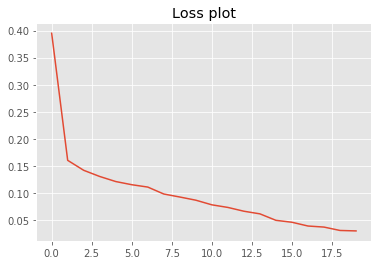

In [25]:
plt.style.use('ggplot')
plt.title("Loss plot")
plt.plot(history.history['loss'])

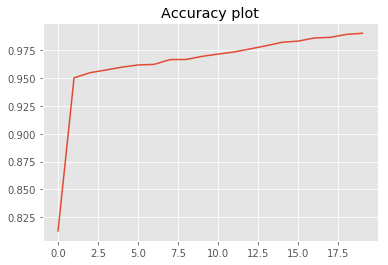

In [26]:
plt.title("Accuracy plot")
plt.plot(history.history['acc'])

Initially the loss decreased pretty quickly and then it started decreasing linearly.